1. ĐỌC FILE DỮ LIỆU VÀ THÊM DỮ LIỆU THÁNG 12 BẰNG CÁCH LẤY TRUNG BÌNH

In [135]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
df = pd.read_csv('co2_northern.csv')

2. LÀM SẠCH DỮ LIỆU

In [136]:
# kiểm tra xem có giá trị nan ko
print(df.isnull().sum())

name                         0
country                      0
city_id                      0
start_time                   0
end_time                     0
original_inventory_sector    0
gas                          0
asset_emissions              0
total_emissions              0
dtype: int64


In [137]:
# thay 2 cột month và year vs end và start_time
df['month'] = pd.to_datetime(df['start_time']).dt.month
df['year'] = pd.to_datetime(df['start_time']).dt.year
# cho 2 cột lên đầu
cols = ['month', 'year'] + [col for col in df.columns if col not in ['month', 'year']]
df = df[cols]
df = df.drop(['start_time','end_time'],axis=1)

3. TÍNH TOÁN DỮ LIỆU

In [138]:
#kiểm tra số lượng lĩnh vực gây ra khí nhà kính và 
df['original_inventory_sector'].unique().size
print(df['original_inventory_sector'].unique())
df['gas'].unique()

['aluminum' 'bauxite-mining'
 'biological-treatment-of-solid-waste-and-biogenic' 'cement' 'chemicals'
 'coal-mining' 'copper-mining' 'cropland-fires' 'domestic-aviation'
 'domestic-shipping' 'electricity-generation'
 'enteric-fermentation-cattle-pasture' 'enteric-fermentation-other'
 'fluorinated-gases' 'incineration-and-open-burning-of-waste'
 'international-aviation' 'international-shipping' 'iron-mining'
 'manure-left-on-pasture-cattle' 'manure-management-other'
 'net-forest-land' 'net-shrubgrass' 'net-wetland' 'oil-and-gas-refining'
 'other-agricultural-soil-emissions' 'other-energy-use'
 'other-fossil-fuel-operations' 'other-manufacturing'
 'other-onsite-fuel-usage' 'other-transport' 'pulp-and-paper' 'railways'
 'rice-cultivation' 'road-transportation' 'rock-quarrying'
 'sand-quarrying' 'solid-fuel-transformation' 'solid-waste-disposal'
 'synthetic-fertilizer-application' 'water-reservoirs' 'crop-residues'
 'domestic-wastewater-treatment-and-discharge'
 'enteric-fermentation-cattl

array(['n2o', 'co2', 'ch4', 'co2e_20yr', 'co2e_100yr'], dtype=object)

In [139]:
# Từ điển ánh xạ các lĩnh vực chi tiết vào các lĩnh vực chính
sector_mapping = {
    'aluminum': 'Công nghiệp',
    'bauxite-mining': 'Công nghiệp',
    'biological-treatment-of-solid-waste-and-biogenic': 'Chất thải',
    'cement': 'Công nghiệp',
    'chemicals': 'Công nghiệp',
    'coal-mining': 'Năng lượng',
    'copper-mining': 'Công nghiệp',
    'cropland-fires': 'Nông nghiệp',
    'domestic-aviation': 'Giao thông',
    'domestic-shipping': 'Giao thông',
    'electricity-generation': 'Năng lượng',
    'enteric-fermentation-cattle-pasture': 'Nông nghiệp',
    'enteric-fermentation-other': 'Nông nghiệp',
    'fluorinated-gases': 'Công nghiệp',
    'incineration-and-open-burning-of-waste': 'Chất thải',
    'international-aviation': 'Giao thông',
    'international-shipping': 'Giao thông',
    'iron-mining': 'Công nghiệp',
    'manure-left-on-pasture-cattle': 'Nông nghiệp',
    'manure-management-other': 'Nông nghiệp',
    'net-forest-land': 'Đất đai',
    'net-shrubgrass': 'Đất đai',
    'net-wetland': 'Đất đai',
    'oil-and-gas-refining': 'Năng lượng',
    'other-energy-use': 'Năng lượng',
    'rice-cultivation': 'Nông nghiệp',
    'solid-waste-disposal': 'Chất thải',
    'road-transportation': 'Giao thông',
    'textiles-leather-apparel': 'Công nghiệp',
    'wood-and-wood-products': 'Công nghiệp'
}
# Ánh xạ lĩnh vực chi tiết thành lĩnh vực chính
df['main_sector'] = df['original_inventory_sector'].map(sector_mapping)

# Kiểm tra kết quả
df = df.drop(['original_inventory_sector'],axis=1)
df.to_csv('a.csv',index=False)

In [140]:
# Nhóm dữ liệu và tính tổng các cột emissions
df.loc[df['gas']=='ch4','total_emissions'] *=82 #đơn vị quy đội gwp
df.loc[df['gas']=='n2o','total_emissions'] *=273
grouped = df[df['gas']!='co2e_100yr'].groupby(['month', 'year', 'name', 'gas', 'main_sector'])['total_emissions'].sum().round(2).reset_index()
grouped.to_csv('co2_nothern_clean.csv',index=False)
# xoá các hàng có giá gas = co2e_100yr do phân tích ngắn hạn
grouped_year = grouped.groupby(['year','gas'])['total_emissions'].sum().round(2).reset_index(name='emissions_gas')
# quy đổi đơn vị về co2e_20yr
grouped_year

,year,gas,emissions_gas
0,2021,ch4,30850889.03
1,2021,co2,34288363.57
2,2021,co2e_20yr,67137504.13
3,2021,n2o,296281.87
4,2022,ch4,29402749.63
5,2022,co2,33454180.48
6,2022,co2e_20yr,64878143.72
7,2022,n2o,304856.81
8,2023,ch4,27295994.70
9,2023,co2,37296960.41


In [141]:
# Pivot dữ liệu để tạo các cột cho ch4, co2, n2o và co2e_20yr theo năm
pivoted = grouped_year.pivot(index='year', columns='gas', values='emissions_gas').reset_index()
# In kết quả
pivoted['other_GHGs'] = pivoted['co2e_20yr']-pivoted['co2']-pivoted['ch4']-pivoted['n2o']
pivoted

gas,year,ch4,co2,co2e_20yr,n2o,other_GHGs
0,2021,30850889.03,34288363.57,67137504.13,296281.87,1701969.66
1,2022,29402749.63,33454180.48,64878143.72,304856.81,1716356.80
2,2023,27295994.70,37296960.41,66655253.18,326043.56,1736254.51
3,2024,27269251.62,37463070.99,66791734.22,323199.52,1736212.09


In [142]:
grouped_sector = grouped.groupby(['main_sector','year'])['total_emissions'].sum().round(2).reset_index(name='emissions_sector')
grouped_sector

,main_sector,year,emissions_sector
0,Chất thải,2021,5868371.88
1,Chất thải,2022,5872360.20
2,Chất thải,2023,5976620.40
3,Chất thải,2024,6082773.60
4,Công nghiệp,2021,16468790.08
5,Công nghiệp,2022,17129975.37
6,Công nghiệp,2023,17717173.74
7,Công nghiệp,2024,17232673.36
8,Giao thông,2021,13947143.96
9,Giao thông,2022,17494468.34


4. VẼ BIỂU ĐỒ

In [143]:
import plotly.express as px
import pandas as pd

# Chuyển dữ liệu sang dạng dài (long format) để Plotly dễ vẽ
df_long = pivoted.melt(id_vars=['year'], value_vars=['ch4', 'co2', 'n2o', 'other_GHGs'], 
                  var_name='gas', value_name='emissions')

# Tạo biểu đồ cột động
fig = px.bar(df_long, x='year', y='emissions', color='gas',
             title='Greenhouse Gas Emissions Over the Years',
             labels={'emissions': 'Emissions', 'year': 'Year', 'gas': 'Gas'},
             barmode='group')  # 'group' để các cột của mỗi năm không bị chồng lên nhau

# Hiển thị biểu đồ
fig.show()

In [144]:
# Tạo biểu đồ cột động
fig = px.bar(grouped_sector,
             x='year',
             y='emissions_sector',
             color='main_sector',
             barmode='group',
             title='Lượng phát thải theo ngành và năm',
             labels={'emissions_sector': 'Lượng phát thải (tấn CO₂e)', 'year': 'Năm'},
             hover_data={'emissions_sector': ':.2f'})

# Tùy chỉnh giao diện biểu đồ
fig.update_layout(
    xaxis_title='Năm',
    yaxis_title='Lượng phát thải (tấn CO₂e)',
    legend_title='Ngành',
    hovermode="x unified"
)

# Hiển thị biểu đồ
fig.show()

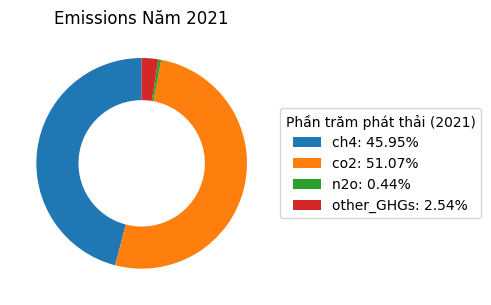

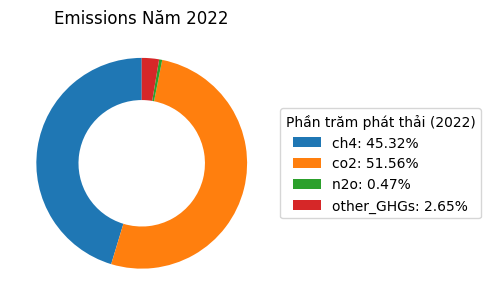

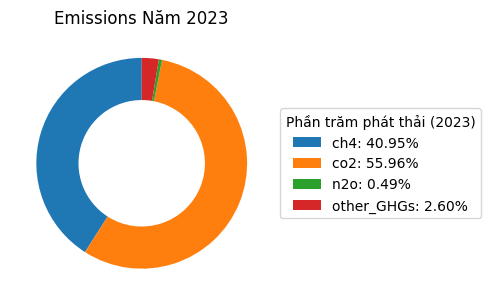

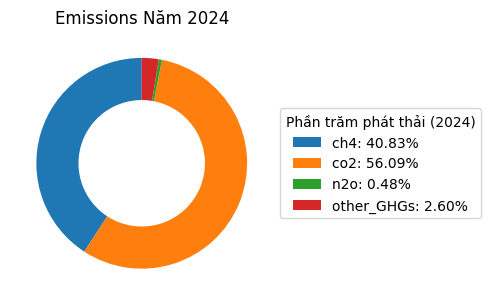

In [145]:
# Lặp qua từng năm trong dữ liệu
for year in grouped_sector['year'].unique():  
    # Lọc dữ liệu theo năm
    data_year = pivoted[pivoted['year'] == year].drop(['year', 'co2e_20yr'], axis=1).squeeze()
    # Tính phần trăm của từng loại khí
    percentages = (data_year / data_year.sum()) * 100
    # Vẽ biểu đồ donut cho năm hiện tại
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(data_year, 
           startangle=90, 
           wedgeprops={'width': 0.4},  # Tạo khoảng trống ở giữa để thành hình donut
           labels=None)  # Không hiển thị nhãn trực tiếp trên biểu đồ
    # Tạo danh sách chú thích với tên khí và phần trăm
    legend_labels = [f"{gas}: {percent:.2f}%" for gas, percent in zip(data_year.index, percentages)]
    # Thêm chú thích (legend) với phần trăm
    ax.legend(legend_labels, title=f"Phần trăm phát thải ({year})", loc="center left", bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Emissions Năm {year}')
    plt.tight_layout()
    plt.show()

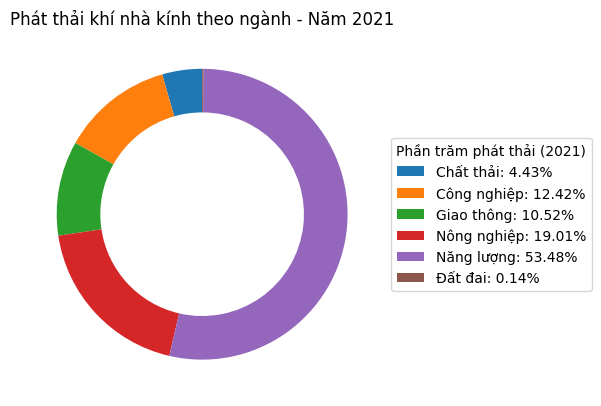

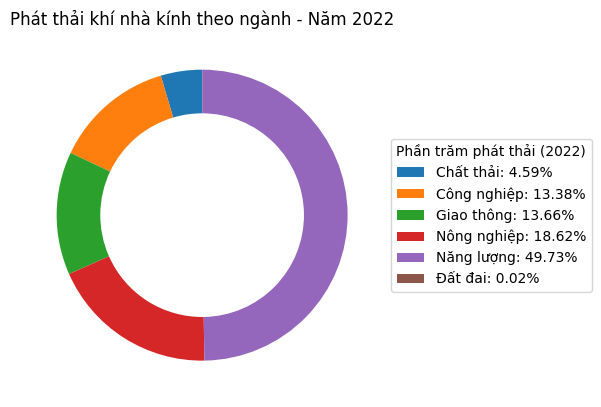

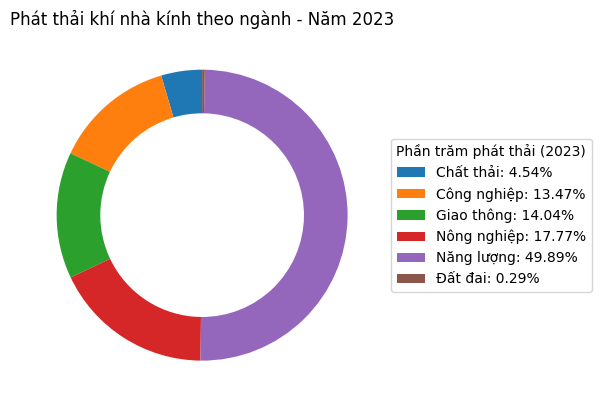

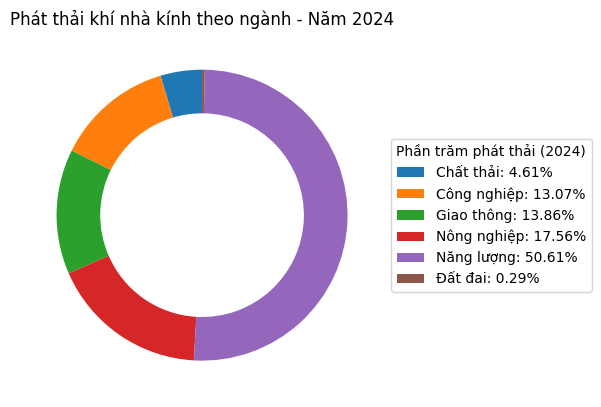

In [146]:
# Vẽ biểu đồ donut cho từng năm
for year in grouped_sector['year'].unique():  # Lấy danh sách các năm duy nhất
    # Lọc dữ liệu theo năm
    data_year = grouped_sector[grouped_sector['year'] == year]
    emissions = data_year['emissions_sector']
    sectors = data_year['main_sector']

    # Tính phần trăm
    percentages = (emissions / emissions.sum()) * 100

    # Vẽ biểu đồ donut
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(emissions, 
           startangle=90, 
           wedgeprops={'width': 0.3},  # Tạo khoảng trống ở giữa để thành hình donut
           labels=None)  # Không hiển thị nhãn trực tiếp trên biểu đồ

    # Tạo danh sách chú thích với tên ngành và phần trăm
    legend_labels = [f"{sector}: {percent:.2f}%" for sector, percent in zip(sectors, percentages)]

    # Thêm chú thích (legend) với phần trăm
    ax.legend(legend_labels, title=f"Phần trăm phát thải ({year})", loc="center left", bbox_to_anchor=(1, 0.5))

    # Đặt tiêu đề cho biểu đồ
    ax.set_title(f'Phát thải khí nhà kính theo ngành - Năm {year}')

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()


In [152]:
summary = grouped.groupby(['gas', 'main_sector','year'])['total_emissions'].sum().reset_index()
summary

,gas,main_sector,year,total_emissions
0,ch4,Chất thải,2021,2948760.00
1,ch4,Chất thải,2022,2950546.32
2,ch4,Chất thải,2023,3003077.76
3,ch4,Chất thải,2024,3056562.72
4,ch4,Công nghiệp,2021,33500.24
...,...,...,...,...
91,n2o,Năng lượng,2024,63372.19
92,n2o,Đất đai,2021,0.00
93,n2o,Đất đai,2022,0.00
94,n2o,Đất đai,2023,0.00
